In [27]:
from langgraph.graph import StateGraph,START,END
from typing import  TypedDict,Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_groq import ChatGroq
# persistance
from langgraph.checkpoint.memory import MemorySaver

In [28]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages:Annotated[list[BaseMessage],add_messages]

In [4]:
llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0.2)
def chat_node(state:ChatState):
    
    # take user input
    input = state["messages"]
    
    # send to llm
    response = llm.invoke(input)
    
    # append response to messages
    return {'messages' : [response]}

    

In [24]:
# add StateGraph
graph = StateGraph(ChatState)
checkpoint = MemorySaver()

# add Nodes
graph.add_node('chat_node', chat_node)

# add Edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpoint)

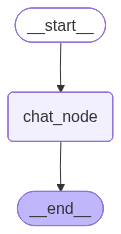

In [25]:
chatbot

In [14]:
inital_state: ChatState = {
    'messages': [HumanMessage(content="Hello! What is the capital of india?")]
}

chatbot.invoke(inital_state)['messages'][-1].content

'The capital of India is New Delhi.'

In [26]:
thread_id = '1'
while True:

    user_input = input("You: ")
    print("You: "  , user_input)
    
    if user_input.strip().lower() in ['exit', 'quit', 'bye']:
        break
    
    config = { 'configurable ' : { 'thread_id' : thread_id } }
    response = chatbot.invoke({'messages': [HumanMessage(content=user_input)]} , config=config)
    print("AI: " , response['messages'][-1].content)


   




You:  hi my name is gaurav


KeyError: 'thread_id'